In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
# Installation of the required packages

!pip install gradio
! pip install -Uqq duckduckgo_search
! [ -e /content ] && pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.6 MB/s eta 0:00:00:00:01


In [24]:
import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from fastai.vision.widgets import *

from fastdownload import download_url

! pip install -Uqq duckduckgo_search
from duckduckgo_search import DDGS
from fastcore.all import *
import time

Searching for black bear


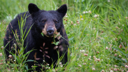

In [30]:
# I will get an image from the web and that I am using as input for the model using the API

import random
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.widgets import *

def search_images(keywords, max_images=30): # 30 is the default the user shared. I may change it
    print(f"Searching for {keywords}")
    return L(DDGS().images(keywords,max_results=max_images)).itemgot('image')

random = random.choice(['grizzly', 'teddy', 'black']) # get a random one

results = search_images(f'{random}' + " bear")
ims = [results[0]]

dest = "images/{}.jpg".format(random + " bear")
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [35]:
from gradio_client import Client, handle_file

# this checks the function via de API of HuggingFace... It seems to work pretty good :D
client = Client("Rokitopd/fastai_bear_classificator")
result = client.predict(
		img=handle_file("images/{} bear.jpg".format(random)),
		api_name="/predict"
)
print(random, result)

Loaded as API: https://rokitopd-fastai-bear-classificator.hf.space ✔
black {'label': 'black', 'confidences': [{'label': 'black', 'confidence': 0.9997028708457947}, {'label': 'grizzly', 'confidence': 0.00029637222178280354}, {'label': 'teddy', 'confidence': 7.092794476193376e-07}]}
